<a href="https://colab.research.google.com/github/norannali/Data-Science-ML-Exercises/blob/main/%F0%9F%8E%B9_Spotify__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

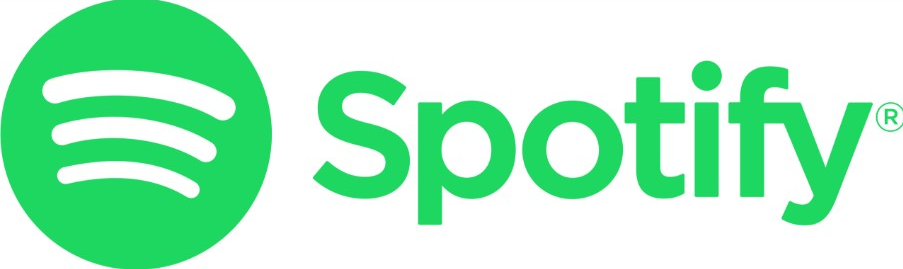

# **Usage**
The dataset can be used for:
*   Building a Recommendation System based on some user input or preference
*  Classification purposes based on audio features and available genres
*   Any other application that you can think of. Feel free to discuss!





# **1. Dataset Description**

Column Description
track_id: The Spotify ID for the track

artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

album_name: The album name in which the track appears

track_name: Name of the track

popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

duration_ms: The track length in milliseconds

explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

loudness: The overall loudness of a track in decibels (dB)

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives

directly from the average beat duration
time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

track_genre: The genre in which the track belongs

In [2]:
#from google.colab import files
#files.upload()

In [3]:
'''import os
import json

!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json'''


'import os\nimport json\n\n!mkdir -p ~/.kaggle\n\n!mv kaggle.json ~/.kaggle/\n\n!chmod 600 ~/.kaggle/kaggle.json'

In [4]:
#!kaggle datasets download -d maharshipandya/-spotify-tracks-dataset

In [5]:
'''import zipfile

with zipfile.ZipFile("/content/-spotify-tracks-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")'''


'import zipfile\n\nwith zipfile.ZipFile("/content/-spotify-tracks-dataset.zip", "r") as zip_ref:\n    zip_ref.extractall("dataset-folder")'

# **1. Load and Inspect the Data**

**1.1: Load the dataset and display the first 5 rows.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
df=pd.read_csv("/content/dataset-folder/dataset.csv")

In [8]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**1.2: Check the shape of the dataset (number of rows and columns).**

In [9]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Columns:", df.columns)
print(df.shape)

Number of rows: 114000
Number of columns: 21
Columns: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
(114000, 21)


**1.3: Display the column names and data types.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


**1.4: Check for missing values in each column.**

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [14]:
df.duplicated().sum()

0

# **2. Data Cleaning**

**2.1: Handle missing values**

In [15]:
df['artists'].fillna('Unknown', inplace=True)
df['album_name'].fillna('Unknown', inplace=True)
df['track_name'].fillna('Unknown', inplace=True)

<ipython-input-15-5ef9e5cfe604>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['artists'].fillna('Unknown', inplace=True)
<ipython-input-15-5ef9e5cfe604>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [16]:
df.dropna(subset=['popularity', 'duration_ms'],inplace=True)

 **2.3: Remove duplicate rows based on track_name and artist_name.**

In [17]:
df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)

 **2.4: Check for and handle outliers in duration_ms (e.g., songs shorter than 30 seconds or longer than 10 minutes).**

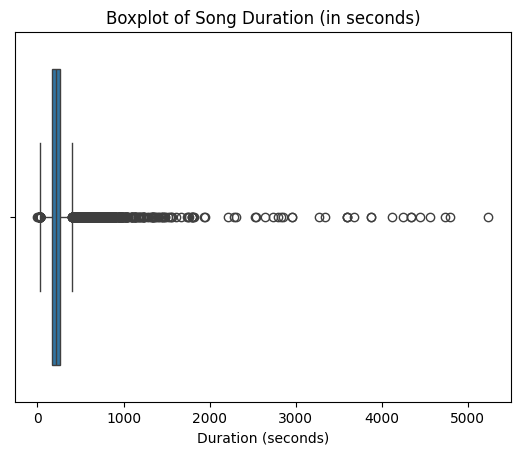

In [18]:
sns.boxplot(x=df['duration_ms'] / 1000)
plt.title('Boxplot of Song Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.show()

In [19]:
outliers = df[(df['duration_ms'] < 30000) | (df['duration_ms'] > 600000)]

In [20]:
outliers

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1251,1251,4TbIOAb7FfbhHi2glq0EwA,Cymande,Cymande,Dove,48,655440,False,0.439,0.47500,...,-12.559,0,0.0361,0.4490,0.253000,0.0903,0.4280,111.717,4,afrobeat
1505,1505,3RZoPvPHZsPTTc94DfWSCL,Fela Kuti,Zombie,Zombie,41,745653,False,0.672,0.94200,...,-5.145,0,0.1860,0.3860,0.014200,0.3840,0.5740,131.450,4,afrobeat
1644,1644,16zRyplwDUve1JKipYBdEt,Newen Afrobeat,Newen Afrobeat,Qué Sabemos,18,625066,False,0.677,0.79900,...,-6.388,1,0.0473,0.0397,0.144000,0.0797,0.7750,125.041,4,afrobeat
1688,1688,7qGrjVQQmh6blinO4DyK3c,Fela Kuti,The Best of the Black President,Lady,18,828586,False,0.747,0.85800,...,-8.081,1,0.0544,0.3020,0.000085,0.1150,0.5360,106.693,4,afrobeat
1820,1820,3IQvH607gDiHXdT8wnqgtC,Tony Allen With Africa 70,"Progress, Jealousy",Jealousy,17,683893,False,0.866,0.63600,...,-12.801,1,0.1340,0.2220,0.558000,0.1310,0.8590,99.615,4,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113579,113579,6cgbrOA9fWSyhkFOgnyn5y,Mc_team,Música Relajante Para Calmar La Mente,Activar la Glándula Pineal,25,705288,False,0.308,0.14800,...,-23.870,1,0.0395,0.8300,0.811000,0.0963,0.0398,116.531,3,world-music
113688,113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.000,0.00002,...,-11.165,1,0.0000,0.1860,1.000000,0.3620,0.0000,0.000,0,world-music
113726,113726,1QNIcIBXg4M2wXvTxHCQuo,Mc_team,Música Relajante Para Calmar La Mente,Flauta India Relajante,24,604806,False,0.132,0.05420,...,-20.167,1,0.0364,0.9690,0.928000,0.0988,0.0518,97.971,4,world-music
113772,113772,2OYba9zhoMDKvoexwBzQk3,Hillsong Worship;TAYA;David Ware,Fresh Wind / What A Beautiful Name (Live),Fresh Wind / What A Beautiful Name - Live,43,611770,False,0.308,0.61300,...,-7.665,1,0.0427,0.0167,0.000000,0.2170,0.1900,127.080,4,world-music


In [21]:
print(f"Outlier percentage: {(559 / df.shape[0]) * 100:.2f}%")

Outlier percentage: 0.69%


In [22]:
df = df[(df['duration_ms'] >= 30000) & (df['duration_ms'] <= 600000)]

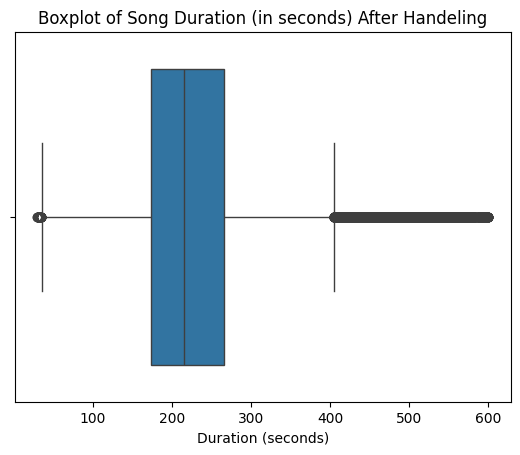

In [23]:
sns.boxplot(x=df['duration_ms'] / 1000)
plt.title('Boxplot of Song Duration (in seconds) After Handeling')
plt.xlabel('Duration (seconds)')
plt.show()

# **3. Exploratory Data Analysis (EDA)**

 **3.1: Analyze the distribution of popularity**:
*   Plot a histogram of popularity.
*   Calculate and display the mean, median, and standard deviation of popularity.



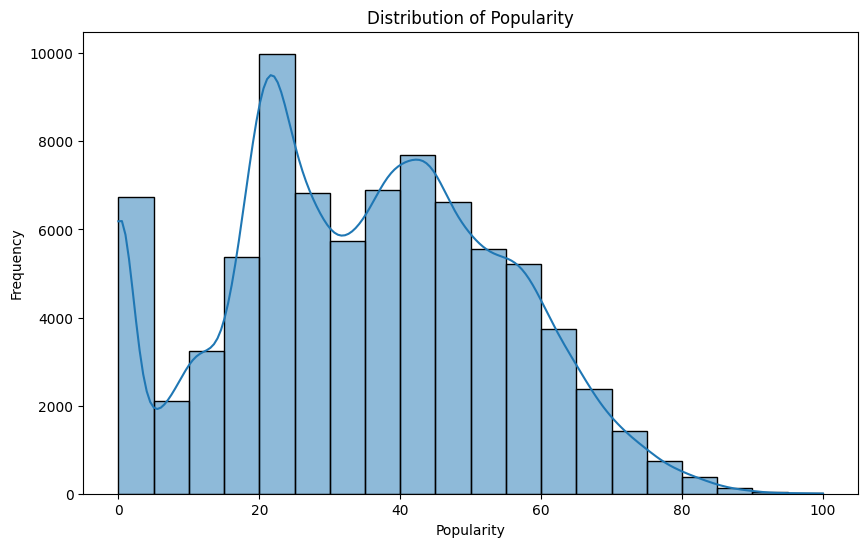

In [24]:
#Plot a histogram of popularity.
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [25]:
#Calculate and display the mean, median, and standard deviation of popularity.
print("Mean Popularity:", df['popularity'].mean())
print("Median Popularity:", df['popularity'].median())
print("Standard Deviation of Popularity:", df['popularity'].std())

Mean Popularity: 34.714860432010894
Median Popularity: 35.0
Standard Deviation of Popularity: 19.431962553292756


# **3.3: Identify the top 10 artists with the most songs:**

Count the number of songs per artist.

Plot a horizontal bar chart for the top 10 artists.

In [26]:
#Count the number of songs per artist.
artist_song_counts = df['artists'].value_counts().head(10)
artist_song_counts

,count
artists,
George Jones,215
my little airport,163
The Beatles,149
Håkan Hellström,120
Scooter,116
Glee Cast,115
Hank Williams,114
BTS,109
Vybz Kartel,105


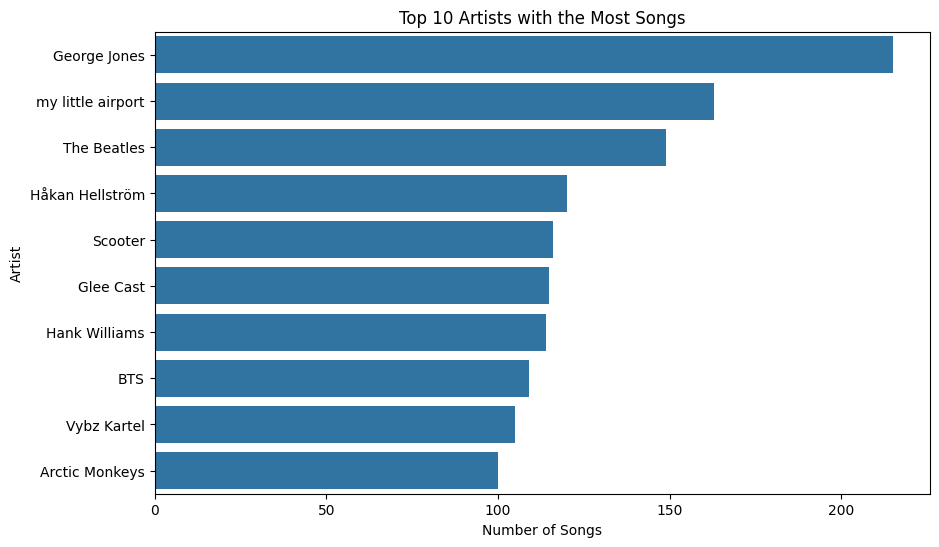

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_song_counts.values, y=artist_song_counts.index, orient='h')
plt.title('Top 10 Artists with the Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

#**3.4: Analyze the distribution of key and mode:**

* Plot a bar chart for the frequency of each key.
* Plot a pie chart for the distribution of mode (major/minor).

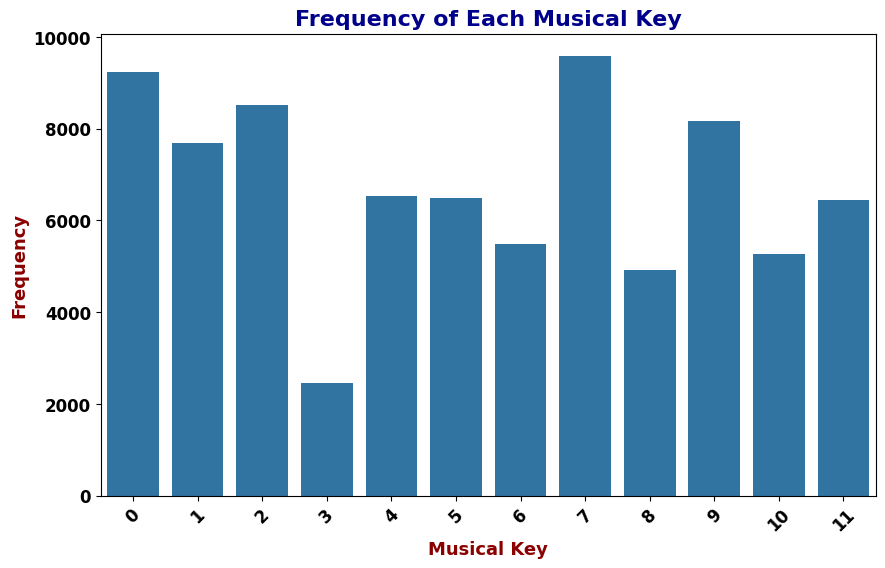

In [28]:
#Plot a bar chart for the frequency of each key.
key_counts = df['key'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=key_counts.index, y=key_counts.values)
plt.title('Frequency of Each Musical Key', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Musical Key', fontsize=13, fontweight='bold', color='darkred')
plt.ylabel('Frequency', fontsize=13, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.show()


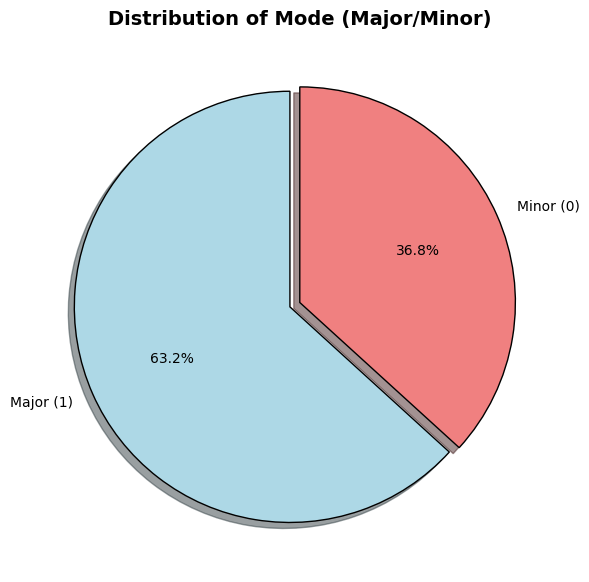

In [29]:
mode_counts = df['mode'].value_counts()
# Define labels and colors
labels = ['Major (1)', 'Minor (0)']
colors = ['lightblue', 'lightcoral']
# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    mode_counts, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=colors, explode=[0.05, 0], shadow=True, wedgeprops={'edgecolor': 'black'}
)
# Add title
plt.title('Distribution of Mode (Major/Minor)', fontsize=14, fontweight='bold')
# Show the plot
plt.show()

# **4. Feature Engineering**

**4.1: Create a feature for the number of artists:**

* If multiple artists are listed in artist_name (separated by commas), count the number of artists.
* Create a new column num_artists.

In [30]:
df['num_artists']=df['artists'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 1)
# Display a sample of the dataset
df[['artists', 'num_artists']].head()


,artists,num_artists
0,Gen Hoshino,1
1,Ben Woodward,1
2,Ingrid Michaelson;ZAYN,2
3,Kina Grannis,1
4,Chord Overstreet,1


 **4.2: Encode categorical variables :**

* Perform one-hot encoding for key and mode.

In [31]:
#Perform one-hot encoding for key and mode.
df=pd.get_dummies(df,columns=['key'])

In [32]:
df=pd.get_dummies(df,columns=['mode'])

In [33]:
#drop Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,...,False,False,False,False,False,False,False,False,True,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,...,False,False,False,False,False,False,False,False,False,True
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,...,False,False,False,False,False,False,False,False,False,True
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,...,False,False,False,False,False,False,False,False,False,True
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,...,False,False,False,False,False,False,False,False,False,True


 **4.3: Create a binary feature for popular songs:**

* Define a song as "popular" if its popularity score is above 70.
* Create a new column is_popular (1 for popular, 0 otherwise).

In [35]:
df['is_popular'] = df['popularity'].apply(lambda x: 1 if x > 70 else 0)

In [36]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,is_popular
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,...,False,False,False,False,False,False,False,True,False,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,...,False,False,False,False,False,False,False,False,True,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,...,False,False,False,False,False,False,False,False,True,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,...,False,False,False,False,False,False,False,False,True,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,...,False,False,False,False,False,False,False,False,True,1


### Part 2: Questions


### Data Cleaning Questions

1. **How many missing values are there in the `artist_name` column? How did you handle them?**
   - 1 null value , i fill it with "unknown" .

2. **Are there any duplicate rows in the dataset? If yes, how many, and how did you handle them?**
   - no.

3. **What is the range of `duration_ms`? Did you find any outliers? How did you handle them?**
   - Range = 569919
   -yes ,i found outlier
   -i delete them becouse the size is less than 5% of the dataset size

---

In [37]:
min_duration = df['duration_ms'].min()
max_duration = df['duration_ms'].max()
duration_range = max_duration - min_duration
print(f"Range of 'duration_ms': {min_duration} - {max_duration} (Range = {duration_range})")

Range of 'duration_ms': 30080 - 599999 (Range = 569919)


## Exploratory Data Analysis (EDA) Questions

4. **What is the distribution of song popularity? Plot a histogram and describe the trend.**
   - Write your answer here.

5. **Which year had the most songs released? Plot a bar chart to show the number of songs released each year.**
   - Write your answer here.

6. **What is the average duration of songs in milliseconds? How has the average duration changed over the years? Plot a line chart to show the trend.**
   - Write your answer here.

7. **Who are the top 5 artists with the most songs in the dataset? Plot a horizontal bar chart to visualize this.**
   - Write your answer here.

8. **What is the most common key for songs in the dataset? Plot a bar chart to show the frequency of each key.**
   - Write your answer here.

9. **What percentage of songs are in a major mode vs. a minor mode? Plot a pie chart to visualize this.**
   - Write your answer here.

   ---
   

4. **What is the distribution of song popularity? Plot a histogram and describe the trend.**

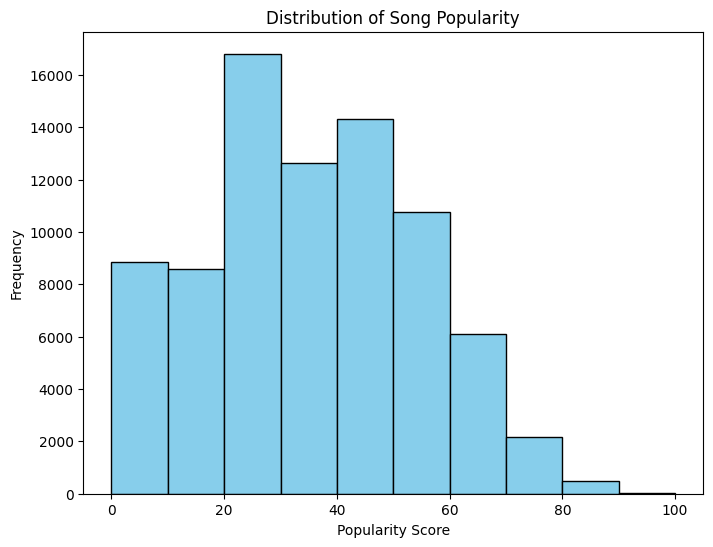

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df['popularity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

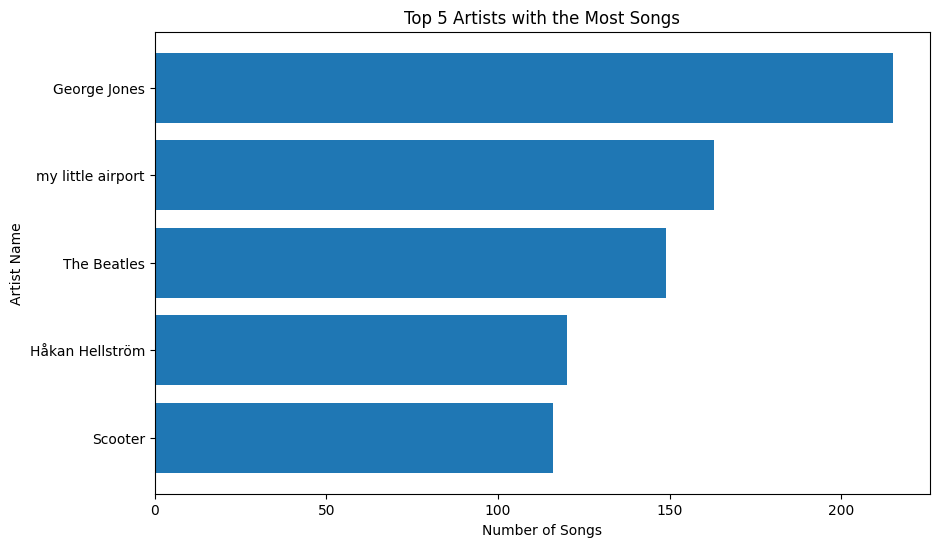

In [39]:
artist_song_counts = df.groupby('artists')['track_name'].count().reset_index()

# Sort by song count in descending order and get the top 5
top_5_artists = artist_song_counts.sort_values('track_name', ascending=False).head(5)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_artists['artists'], top_5_artists['track_name'])
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.title('Top 5 Artists with the Most Songs')
plt.gca().invert_yaxis()  # Invert y-axis to show the top artist at the top
plt.show()


### Insights and Interpretation Questions

13. **What percentage of songs in the dataset are "popular" (based on your definition of popularity)?**
    - Percentage of popular songs: 93.34%

14. **Are there any trends in song duration over the years? For example, are songs getting shorter or longer?**
    - Write your answer here.

15. **Which artist has the most songs in the dataset? Is there a correlation between the number of songs and their popularity?**
    - Artist with the most songs: George Jones, with 215 songs

16. **What is the most common key and mode for songs in the dataset? Do these factors influence song popularity?**
    - Write your answer here.

In [40]:
popularity_threshold = 0.8
popular_songs = df[df['popularity'] > popularity_threshold]
percentage_popular = (len(popular_songs) / len(df)) * 100

print(f"Percentage of popular songs: {percentage_popular:.2f}%")

Percentage of popular songs: 93.34%


In [41]:
artist_song_counts = df.groupby('artists')['track_name'].count().reset_index()
artist_with_most_songs = artist_song_counts.loc[artist_song_counts['track_name'].idxmax()]
print(f"Artist with the most songs: {artist_with_most_songs['artists']}, with {artist_with_most_songs['track_name']} songs")

Artist with the most songs: George Jones, with 215 songs


In [42]:
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()
artist_data = pd.merge(artist_song_counts, artist_popularity, on='artists')

In [43]:
correlation = artist_data['track_name'].corr(artist_data['popularity'])
print(f"Correlation between number of songs and popularity: {correlation:.2f}")


Correlation between number of songs and popularity: -0.05


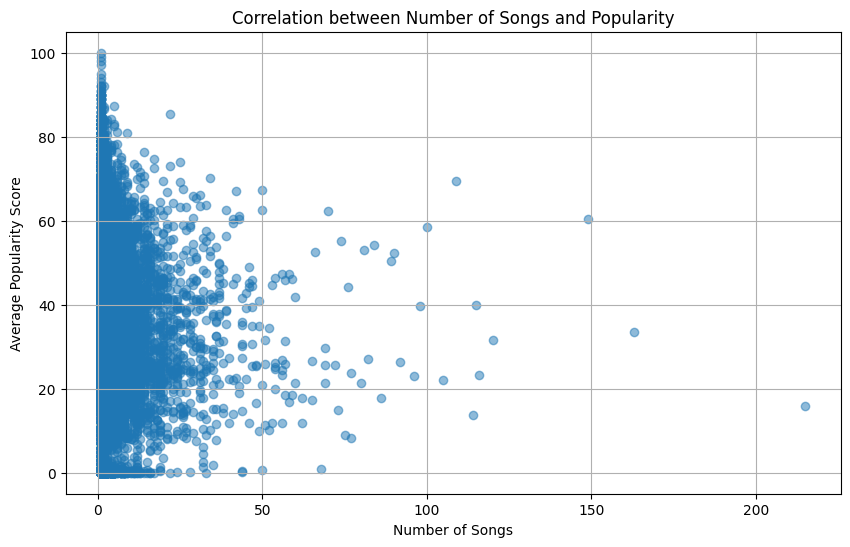

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(artist_data['track_name'], artist_data['popularity'], alpha=0.5)
plt.title('Correlation between Number of Songs and Popularity')
plt.xlabel('Number of Songs')
plt.ylabel('Average Popularity Score')
plt.grid(True)
plt.show()



### Feature Engineering Questions

10. **How did you create the `num_artists` feature? What does it represent, and why is it useful?**
    - counting the number of unique artists associated with each song. This feature helps capture the number of artists involved in the production of a song, which can provide insights into collaboration patterns in the music industry.

11. **What new features did you extract from the `release_date` column? How do they help in analysis?**
    - Write your answer here.

12. **Did you create any binary features (e.g., `is_popular`)? If yes, how did you define them, and what insights do they provide?**
    - helps classify songs into two categories: popular and not popular. This binary classification can be used to analyze patterns or characteristics of popular songs versus less popular ones, such as genre, artist collaboration, or duration.
---

In [48]:
df['num_artists'] = df['artists'].apply(lambda x: len(x.split(';')))

In [49]:
df['is_popular'] = df['popularity'].apply(lambda x: 1 if x > 70 else 0)